## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.769482 -0.973003 -0.142028  0.569497 -1.287929 -1.005897
1  0.417915 -0.755068  0.234757 -0.086066 -1.220884 -0.771578
2 -0.582086  1.233540  0.159474 -0.062189 -0.570432 -0.116679
3  1.274273  0.221109 -1.308741 -1.240576  0.529148  0.703960
4 -1.034536  1.223776 -1.541300  1.837213 -1.352698  1.066547


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0294701	total: 61.1ms	remaining: 1m 1s
1:	learn: 1.0178941	total: 61.6ms	remaining: 30.8s
2:	learn: 1.0049152	total: 62ms	remaining: 20.6s
3:	learn: 0.9938631	total: 62.5ms	remaining: 15.6s
4:	learn: 0.9839508	total: 63.1ms	remaining: 12.6s
5:	learn: 0.9717825	total: 63.6ms	remaining: 10.5s
6:	learn: 0.9588818	total: 64ms	remaining: 9.07s
7:	learn: 0.9483956	total: 64.4ms	remaining: 7.99s
8:	learn: 0.9389327	total: 64.8ms	remaining: 7.13s
9:	learn: 0.9283408	total: 65.2ms	remaining: 6.45s
10:	learn: 0.9185307	total: 65.5ms	remaining: 5.89s
11:	learn: 0.9081810	total: 65.9ms	remaining: 5.43s
12:	learn: 0.8966796	total: 66.3ms	remaining: 5.03s
13:	learn: 0.8867089	total: 66.7ms	remaining: 4.7s
14:	learn: 0.8781095	total: 67.1ms	remaining: 4.41s
15:	learn: 0.8681540	total: 67.5ms	remaining: 4.15s
16:	learn: 0.8589384	total: 67.8ms	remaining: 3.92s
17:	learn: 0.8506601	total: 68.2ms	remaining: 3.72s
18:	learn: 0.8417179	total: 68.7ms	remaining: 3.5

55:	learn: 0.5662253	total: 87.1ms	remaining: 1.47s
56:	learn: 0.5605272	total: 87.7ms	remaining: 1.45s
57:	learn: 0.5556622	total: 88.1ms	remaining: 1.43s
58:	learn: 0.5515146	total: 88.5ms	remaining: 1.41s
59:	learn: 0.5459285	total: 89ms	remaining: 1.39s
60:	learn: 0.5407623	total: 89.6ms	remaining: 1.38s
61:	learn: 0.5360447	total: 90ms	remaining: 1.36s
62:	learn: 0.5306225	total: 90.5ms	remaining: 1.34s
63:	learn: 0.5253513	total: 90.9ms	remaining: 1.33s
64:	learn: 0.5203789	total: 91.4ms	remaining: 1.31s
65:	learn: 0.5163627	total: 91.9ms	remaining: 1.3s
66:	learn: 0.5108709	total: 92.3ms	remaining: 1.28s
67:	learn: 0.5060450	total: 92.7ms	remaining: 1.27s
68:	learn: 0.5007079	total: 93.2ms	remaining: 1.26s
69:	learn: 0.4960057	total: 93.6ms	remaining: 1.24s
70:	learn: 0.4914194	total: 94ms	remaining: 1.23s
71:	learn: 0.4868172	total: 94.6ms	remaining: 1.22s
72:	learn: 0.4815457	total: 95.1ms	remaining: 1.21s
73:	learn: 0.4770154	total: 95.5ms	remaining: 1.19s
74:	learn: 0.471822

252:	learn: 0.1269413	total: 184ms	remaining: 542ms
253:	learn: 0.1264456	total: 184ms	remaining: 541ms
254:	learn: 0.1259797	total: 185ms	remaining: 539ms
255:	learn: 0.1253874	total: 185ms	remaining: 538ms
256:	learn: 0.1247594	total: 186ms	remaining: 537ms
257:	learn: 0.1242765	total: 186ms	remaining: 535ms
258:	learn: 0.1234845	total: 186ms	remaining: 534ms
259:	learn: 0.1230479	total: 187ms	remaining: 532ms
260:	learn: 0.1224962	total: 187ms	remaining: 530ms
261:	learn: 0.1219330	total: 188ms	remaining: 529ms
262:	learn: 0.1212513	total: 188ms	remaining: 527ms
263:	learn: 0.1205753	total: 188ms	remaining: 525ms
264:	learn: 0.1201677	total: 189ms	remaining: 524ms
265:	learn: 0.1195825	total: 190ms	remaining: 523ms
266:	learn: 0.1192028	total: 190ms	remaining: 522ms
267:	learn: 0.1188549	total: 191ms	remaining: 521ms
268:	learn: 0.1184280	total: 191ms	remaining: 519ms
269:	learn: 0.1180471	total: 191ms	remaining: 517ms
270:	learn: 0.1176604	total: 192ms	remaining: 516ms
271:	learn: 

430:	learn: 0.0576174	total: 270ms	remaining: 356ms
431:	learn: 0.0573395	total: 270ms	remaining: 355ms
432:	learn: 0.0571750	total: 271ms	remaining: 354ms
433:	learn: 0.0569401	total: 271ms	remaining: 354ms
434:	learn: 0.0567111	total: 272ms	remaining: 353ms
435:	learn: 0.0564107	total: 272ms	remaining: 352ms
436:	learn: 0.0561472	total: 273ms	remaining: 351ms
437:	learn: 0.0558989	total: 273ms	remaining: 350ms
438:	learn: 0.0556087	total: 274ms	remaining: 350ms
439:	learn: 0.0553253	total: 274ms	remaining: 349ms
440:	learn: 0.0550752	total: 275ms	remaining: 348ms
441:	learn: 0.0548309	total: 275ms	remaining: 347ms
442:	learn: 0.0546164	total: 276ms	remaining: 347ms
443:	learn: 0.0543715	total: 276ms	remaining: 346ms
444:	learn: 0.0541633	total: 277ms	remaining: 345ms
445:	learn: 0.0539592	total: 277ms	remaining: 344ms
446:	learn: 0.0537513	total: 278ms	remaining: 344ms
447:	learn: 0.0535550	total: 278ms	remaining: 343ms
448:	learn: 0.0533294	total: 279ms	remaining: 342ms
449:	learn: 

623:	learn: 0.0270005	total: 366ms	remaining: 221ms
624:	learn: 0.0269843	total: 367ms	remaining: 220ms
625:	learn: 0.0268265	total: 367ms	remaining: 219ms
626:	learn: 0.0267779	total: 367ms	remaining: 219ms
627:	learn: 0.0266755	total: 368ms	remaining: 218ms
628:	learn: 0.0266595	total: 369ms	remaining: 217ms
629:	learn: 0.0266436	total: 369ms	remaining: 217ms
630:	learn: 0.0265027	total: 369ms	remaining: 216ms
631:	learn: 0.0264872	total: 370ms	remaining: 215ms
632:	learn: 0.0263342	total: 370ms	remaining: 215ms
633:	learn: 0.0263188	total: 371ms	remaining: 214ms
634:	learn: 0.0262198	total: 371ms	remaining: 213ms
635:	learn: 0.0262045	total: 372ms	remaining: 213ms
636:	learn: 0.0261895	total: 372ms	remaining: 212ms
637:	learn: 0.0260401	total: 373ms	remaining: 212ms
638:	learn: 0.0260252	total: 373ms	remaining: 211ms
639:	learn: 0.0259615	total: 374ms	remaining: 210ms
640:	learn: 0.0259467	total: 374ms	remaining: 210ms
641:	learn: 0.0258842	total: 375ms	remaining: 209ms
642:	learn: 

804:	learn: 0.0156743	total: 452ms	remaining: 110ms
805:	learn: 0.0156364	total: 453ms	remaining: 109ms
806:	learn: 0.0155989	total: 453ms	remaining: 108ms
807:	learn: 0.0155350	total: 454ms	remaining: 108ms
808:	learn: 0.0154720	total: 454ms	remaining: 107ms
809:	learn: 0.0154601	total: 454ms	remaining: 107ms
810:	learn: 0.0154082	total: 455ms	remaining: 106ms
811:	learn: 0.0153718	total: 455ms	remaining: 105ms
812:	learn: 0.0153358	total: 456ms	remaining: 105ms
813:	learn: 0.0153002	total: 456ms	remaining: 104ms
814:	learn: 0.0152534	total: 457ms	remaining: 104ms
815:	learn: 0.0152183	total: 457ms	remaining: 103ms
816:	learn: 0.0151787	total: 458ms	remaining: 103ms
817:	learn: 0.0151441	total: 458ms	remaining: 102ms
818:	learn: 0.0151099	total: 459ms	remaining: 101ms
819:	learn: 0.0150316	total: 459ms	remaining: 101ms
820:	learn: 0.0149979	total: 460ms	remaining: 100ms
821:	learn: 0.0149647	total: 460ms	remaining: 99.6ms
822:	learn: 0.0149318	total: 461ms	remaining: 99.1ms
823:	learn

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

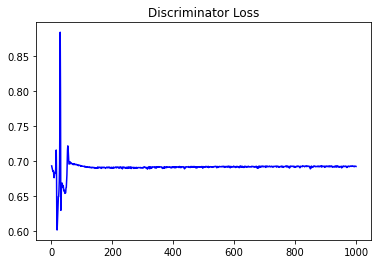

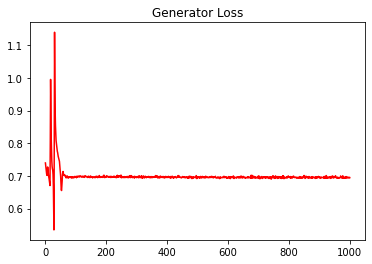

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.07143188013138158


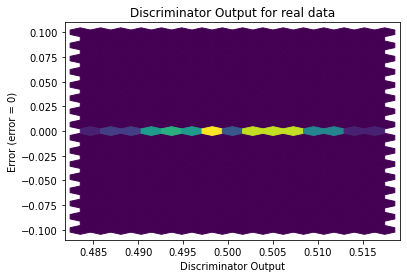

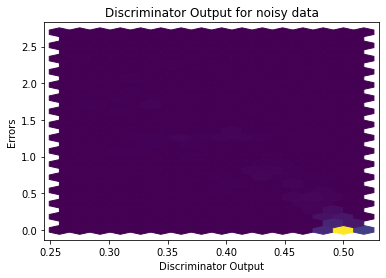

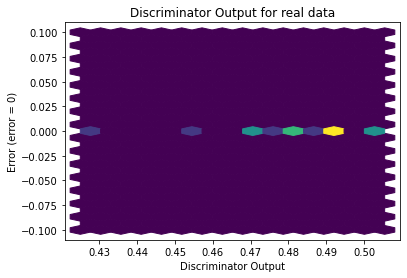

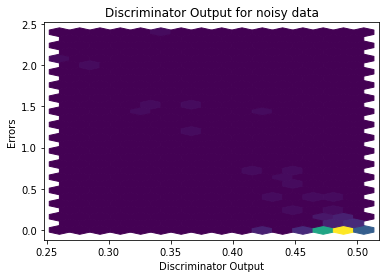

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


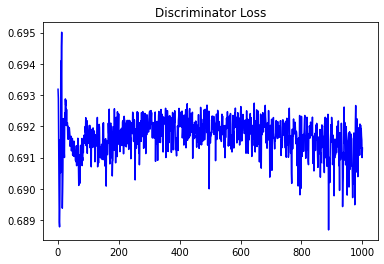

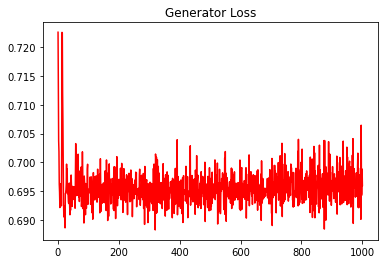

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.046837191895107336


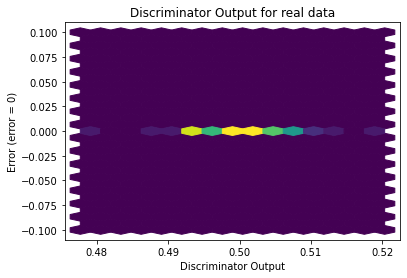

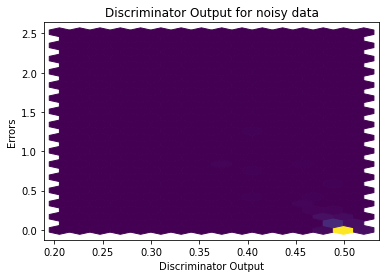

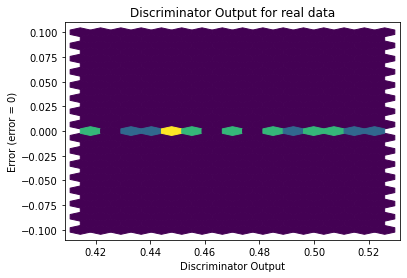

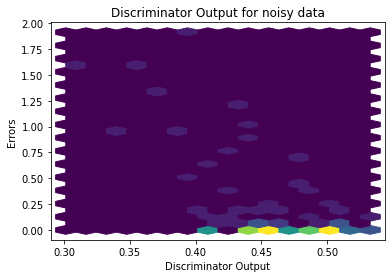

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5755]], requires_grad=True)
